In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, expon, uniform
import math

In [2]:
# Read the excel file
df = pd.read_excel('../PCS_TEST_DETERMINSTIC_19S2.xls')
df.head()

,Arrival no,Arrival time (sec),Base station,Call duration (sec),velocity (km/h)
0,1,0.000000,18,76.133611,125.934254
1,2,0.067744,7,159.056244,95.510881
2,3,0.559184,6,179.465053,127.757456
3,4,0.625319,14,163.108320,134.310552
4,5,1.345066,2,95.054472,112.272359


In [3]:
# Chi-Square Test parameters
n = 10000
k = 100
p_j = 1/k

### 1. Inter Arrival Time

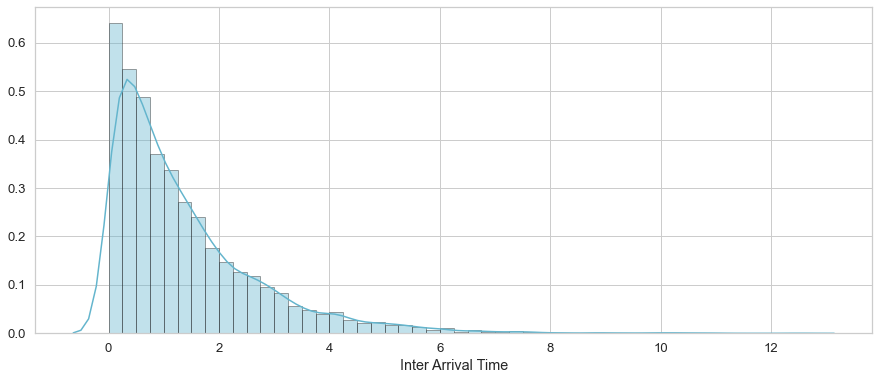

In [4]:
# Set the display for the historgram
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(15, 6))

# Calculate inter-arrival times
arrival_time = pd.concat([pd.Series([0.0]), df['Arrival time (sec)']], ignore_index=True)
inter_arrival_time = pd.Series([arrival_time[i+1] - arrival_time[i] for i in range(10000)],\
                               name='Inter Arrival Time')

# Plot the histogram of IAT
sns.distplot(inter_arrival_time, color='c', hist_kws=dict(ec="k"), label='Inter Arrival Time')
plt.show()

In [5]:
print("Minimum: {:f}".format(inter_arrival_time.min()))
print("Maximum: {:f}".format(inter_arrival_time.max()))
print("Mean: {:f}".format(inter_arrival_time.mean()))
print("Unbiased Variance: {:f}".format(inter_arrival_time.var(ddof=1)))
print("Biased Variance: {:f}".format(inter_arrival_time.var(ddof=0)))

Minimum: 0.000000
Maximum: 12.498550
Mean: 1.369680
Unbiased Variance: 1.806135
Biased Variance: 1.805954


#### Chi-Square Test for Inter Arrival Time (IAT)

For n = 10000, choose k = 100

In [6]:
# Obtain 100 class intervals 
iat_class_interval = [0]
iat_mean = inter_arrival_time.mean()

for i in range(1, k):
    iat_class_interval.append(expon.ppf(i*p_j, scale=iat_mean))
    
iat_class_interval.append(math.inf)

In [7]:
# Calculate the test statistic
iat_test_statistic = 0
for i in range(k):
    N_j = len(inter_arrival_time[(iat_class_interval[i] <= inter_arrival_time) \
                                 & (inter_arrival_time < iat_class_interval[i+1])])
    iat_test_statistic += (N_j - n*p_j)**2/(n*p_j)

print("Test statisic:", iat_test_statistic)

Test statisic: 113.33999999999997


### 2. Base Station

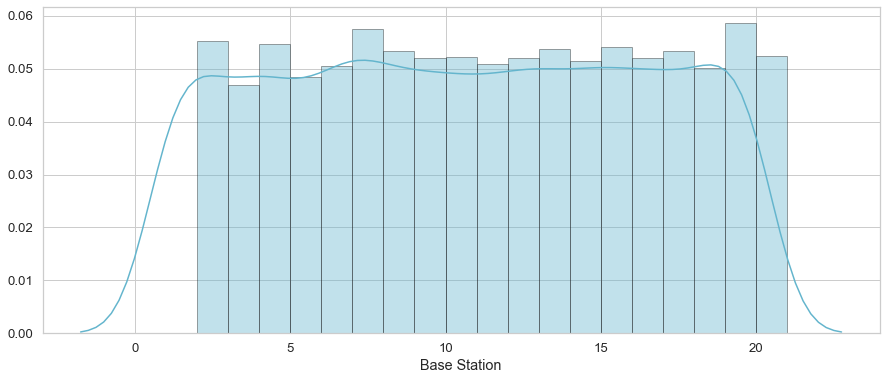

In [8]:
# Set the display for the historgram
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(15, 6))

# Collect data for base stations of every call
base_station = df['Base station '].rename('Base Station')

# Plot the histogram of base stations
sns.distplot(base_station, color='c', bins=np.arange(2,22), hist_kws=dict(ec="k"))
plt.show()

In [9]:
print("Minimum: {:d}".format(base_station.min()))
print("Maximum: {:d}".format(base_station.max()))

Minimum: 1
Maximum: 20


#### Chi-Square Test for Base Station

Choose k = 20 as the values are discrete (integers from 1 to 20)

In [10]:
# Obtain 20 class intervals 
station_class_interval = [1]

for i in range(1, 20):
    station_class_interval.append(int(uniform.ppf(i*(1/20), scale=20, loc=1)))
    
station_class_interval.append(math.inf)

In [11]:
# Calculate the test statistic
station_test_statistic = 0
for i in range(20):
    N_j = len(base_station[(station_class_interval[i] <= base_station) \
                                 & (base_station < station_class_interval[i+1])])
    station_test_statistic += (N_j - n*(1/20))**2/(n*(1/20))

print("Test statisic:", station_test_statistic)

Test statisic: 25.656


### 3.  Call Duration

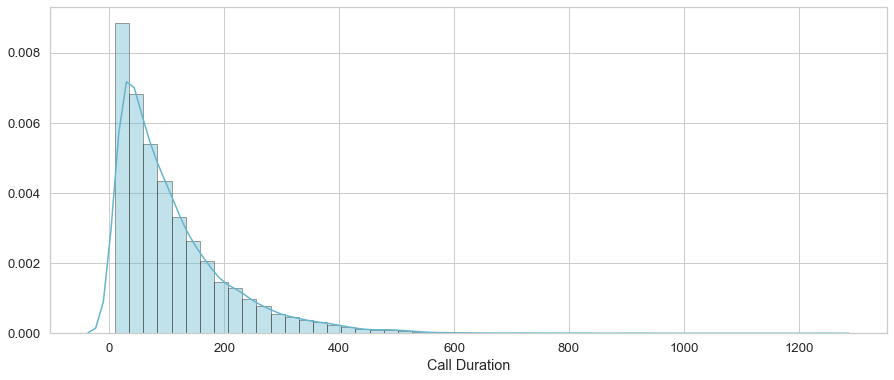

In [12]:
# Set the display for the historgram
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(15, 6))

# Collect data for call durations of every call
call_duration = df['Call duration (sec)'].rename('Call Duration')

# Plot the histogram of call durations
sns.distplot(call_duration, color='c', hist_kws=dict(ec="k"))
plt.show()

In [13]:
print("Minimum: {:f}".format(call_duration.min()))
print("Maximum: {:f}".format(call_duration.max()))
print("Mean: {:f}".format(call_duration.mean()))
print("Unbiased Variance: {:f}".format(call_duration.var(ddof=1)))
print("Biased Variance: {:f}".format(call_duration.var(ddof=0)))

Minimum: 10.003952
Maximum: 1239.836192
Mean: 109.835901
Unbiased Variance: 9828.524717
Biased Variance: 9827.541865


#### Chi-Square Test for Call Duration

For n = 10000, choose k = 100

In [14]:
# Shift the call duration to the left such that the min. call duration is 0
shifted_duration = call_duration - call_duration.min()

# Obtain 100 class intervals
duration_class_interval = [0]
duration_mean = shifted_duration.mean()

for i in range(1, k):
    duration_class_interval.append(expon.ppf(i*p_j, scale=duration_mean))
    
duration_class_interval.append(math.inf)

In [15]:
# Calculate the test statistic
duration_test_statistic = 0
for i in range(k):
    N_j = len(call_duration[(duration_class_interval[i] <= shifted_duration) \
                            & (shifted_duration < duration_class_interval[i+1])])
    duration_test_statistic += (N_j - n*p_j)**2/(n*p_j)

print("Test statistic:", duration_test_statistic)

Test statistic: 97.01999999999998


### 4. Car Speed

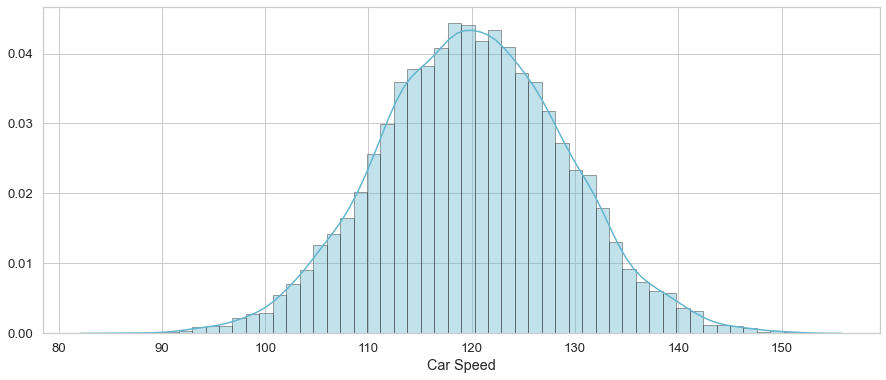

In [16]:
# Set the display for the historgram
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(15, 6))

# Collect data for car speeds in every call
car_speed = df['velocity (km/h)'].rename('Car Speed')

# Plot the histogram of car speeds
sns.distplot(car_speed, color='c', hist_kws=dict(ec="k"))
plt.show()

In [17]:
print("Minimum: {:f}".format(car_speed.min()))
print("Maximum: {:f}".format(car_speed.max()))
print("Mean: {:f}".format(car_speed.mean()))
print("Unbiased Variance: {:f}".format(car_speed.var(ddof=1)))
print("Biased Variance: {:f}".format(car_speed.var(ddof=0)))

Minimum: 86.423152
Maximum: 151.501467
Mean: 120.072098
Unbiased Variance: 81.343405
Biased Variance: 81.335271


#### Chi-Square Test for Car Speed

For n = 10000, choose k = 100

In [18]:
# Obtain 100 class intervals
speed_class_interval = [0]
speed_mean = car_speed.mean()
speed_std = math.sqrt(car_speed.var(ddof=0))

for i in range(1, k):
    speed_class_interval.append(norm.ppf(i*p_j, loc=speed_mean, scale=speed_std))
    
speed_class_interval.append(math.inf)

In [19]:
# Calculate the test statistic
speed_test_statistic = 0
for i in range(k):
    N_j = len(car_speed[(speed_class_interval[i] <= car_speed) & (car_speed < speed_class_interval[i+1])])
    speed_test_statistic += (N_j - n*p_j)**2/(n*p_j)

print("Test statistic:", speed_test_statistic)

Test statistic: 96.44
